Importing required modules

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf


Loading the dataset

In [27]:
df = pd.read_csv('Fraud (1).csv')

Checking for missing values 

In [28]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No missing values in our data

Selecting required features for preditcion

In [29]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [30]:
df = df.drop(columns= ['nameOrig','nameDest'])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


Data Exploration

Checing amounts based on transaction types

In [31]:
paw = df.groupby('type').amount.sum()
paw
paw[0],paw[1]
amt = []
for i in range(5):
    amt.append(paw[i])

trans = df.type.unique()
trans
trans = np.sort(trans)
trans = trans.tolist()
trans

['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

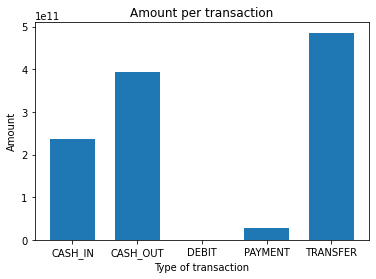

In [32]:
plt.bar(trans,amt,width = 0.7)
plt.xlabel('Type of transaction')
plt.ylabel('Amount')
plt.title('Amount per transaction')
plt.show()

Checking which type of tranasactions involves fraud

In [33]:
df.loc[df.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

Checking number of fraud and non fraud transactions
Exploring isFlaggedFraud 

In [34]:
frauddf = df.loc[df.isFraud == 1]
fraud_count = frauddf.isFraud.count()
fraud_count

8213

In [35]:
notfrauddf = df.loc[df.isFraud == 0]
notfraud_count = notfrauddf.isFraud.count()
notfraud_count

6354407

In [36]:
isFlaggedfraud = df.isFlaggedFraud.sum()
isFlaggedfraud

16

Model Building

In [37]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


Droppoing isFlaggedFraud column as a feature

In [38]:
df =df.drop(columns=['isFlaggedFraud'])

Creating training and testing data

In [39]:
df.columns

X = df.iloc[:,0:7]
Y = df.iloc[:,-1]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 4) 

In [40]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=3,
    restore_best_weights=True
)


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train,y_train,batch_size =256,epochs=50,validation_data=(X_test,y_test),callbacks= [early_stopping])



Epoch 1/50
 5192/19884 [======>.......................] - ETA: 23s - loss: 31.2292 - accuracy: 0.9899

KeyboardInterrupt: 

In [ ]:
y_pred = ann.predict(X_test)


39767/39767 [==============================] - 52s 1ms/step
